### Import and Install

In [1]:
#!pip install scikit-learn
#!pip install scikit-learn==0.19.1
#!pip install pandas emoji

In [2]:
#!pip install nltk

In [3]:
#!pip install evaluate

In [4]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import asarray
from numpy import absolute
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from xgboost import XGBClassifier
%matplotlib inline

# Sklearn Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
import timeit

# evaluate xgboost ensemble for regression

from xgboost import XGBRegressor
import hashlib

#Plotting
from matplotlib import pyplot

#Transformer
from transformers import pipeline
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer

2023-09-15 17:04:09.436638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 17:04:09.558209: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-15 17:04:09.978490: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/raquiba/anaconda3/lib/python3.9/site-packages/nvidia/cudnn/lib:/home/raquiba/anaconda3/lib/:
2023-09-15 17:04:09.978547: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynami

### Data Initialization

In [5]:
df = pd.read_csv("Bangla-SARC/SarcasDetection.csv", header = None)

In [6]:
df.head(10)

0                                                  1      2
0  NaN                                           Comments  Label
1  0.0  আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...    1.0
2  1.0  আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...    1.0
3  2.0  বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...    1.0
4  3.0                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ    1.0
5  4.0         থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন    1.0
6  5.0  আজ আমাকে খোদাই করার জন্য ধন্যবাদ, যথাযথ ভাল বন...    1.0
7  6.0  আমি এমন পরিকল্পনাগুলি পছন্দ করি যা কখনই ঘটে না...    1.0
8  7.0  আমি যখন কাউকে দীর্ঘশ্বাস শুনি, ‘জীবন কঠিন,’ আম...    1.0
9  8.0  আমি বলছি না আমি আপনাকে ঘৃণা করি, আমি যা বলছি ত...    1.0

In [7]:
# Find out length of data set
len(df)

5113

In [8]:
# delete first row containing all the labels
df = df.drop(index=0, axis=0)

In [9]:
df.head()

0                                                  1    2
1  0.0  আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...  1.0
2  1.0  আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...  1.0
3  2.0  বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...  1.0
4  3.0                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ  1.0
5  4.0         থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন  1.0

In [10]:
df.columns = ["id","comments","label"]
df.head()

id                                           comments label
1  0.0  আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...   1.0
2  1.0  আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...   1.0
3  2.0  বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...   1.0
4  3.0                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ   1.0
5  4.0         থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন   1.0

In [11]:
df.dtypes

id          float64
comments     object
label        object
dtype: object

In [12]:
# show amount of missing value 
print(df.isnull().sum())
print(df.shape)

id          0
comments    0
label       0
dtype: int64
(5112, 3)


In [13]:
df["id"] = df["id"].astype('int32')
df.head()

id                                           comments label
1   0  আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...   1.0
2   1  আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...   1.0
3   2  বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...   1.0
4   3                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ   1.0
5   4         থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন   1.0

In [14]:
# Couldn't convert object type data to integer directly. TDue to this reason converting object -> float -> integer
# convert object type data to float
df["label"] = pd.to_numeric(df["label"])
# convert float to integer
df["label"] = df["label"].astype('int32')

In [15]:
df["label"]

1       1
2       1
3       1
4       1
5       1
       ..
5108    0
5109    0
5110    0
5111    0
5112    0
Name: label, Length: 5112, dtype: int32

In [16]:
# Check data type
df.dtypes

id           int32
comments    object
label        int32
dtype: object

In [17]:
# shape of data
df.shape

(5112, 3)

In [18]:
# count the number of data consist irony or non irony data
df.label.value_counts()

label
0    3159
1    1953
Name: count, dtype: int64

### CUDA

In [19]:
# Checking if GPU and NVIDIA are available
!nvidia-smi

/bin/bash: /home/raquiba/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Fri Sep 15 17:04:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 54%   37C    P8    33W / 350W |  10370MiB / 24576MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-

In [20]:
# Specifying CUDA as the device for torch
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3090'

In [21]:
print(torch.version.cuda)

11.6


In [22]:
torch.cuda.device_count()

1

In [23]:
torch.cuda.is_available()

True

#### Check CUDA

In [24]:
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.device(0)
#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
    
torch.cuda.memory_summary(device=None, abbreviated=False)

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [25]:
# The cache memory was full. Got cuda out of memory error. Need to empty the cache
torch.cuda.empty_cache()

### Data Exploration

In [26]:
# 1) Handle missing value
# 2) Normalize the data
def dataExplore(df):
    #Handle Missing Value
    df = df.fillna(0)
    df_max = df.max()
    df_min = df.min()
    #print(df_max)

    for i in df.index:
        #Normalize the data
        df[i] = (df[i]-df.min())/(df.max()-df.min())
    return df

In [27]:
# print min, max and average of title 
def min_max_average(df, s):
    # Find minimum, maximum and average score of fake news title
    min = df.min()
    print("Minimum score of", s,":", min)

    max = df.max()
    print("Maximum score of", s,":", max)

    avg = df.mean()
    print("Average of", s,":", avg)

#find out only average
def avgVal(df):    
    avg = df.mean()
    return avg


In [28]:
# Plot the prediction results of comments
def plotData(df, s, df_real, s_real):
    fig, ax = plt.subplots()
    sns.kdeplot(x=df_fake,  ax=ax, color='r')
    ax2 = ax.twinx()
    g = sns.kdeplot(x=df_real, ax=ax2, color='b')
    plt.legend(loc='upper left', labels=["real","fake"])
    #plt.title(s_fake, s_real)
    plt.show(g)

In [29]:
df.head()

id                                           comments  label
1   0  আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...      1
2   1  আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...      1
3   2  বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...      1
4   3                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ      1
5   4         থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন      1

#### Removing Emoji

In [30]:
import emoji
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df_new = df["comments"]
df_new = df_new.apply(remove_emojis)

In [31]:
df_new.head()

1    আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...
2    আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...
3    বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...
4                     হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ
5           থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন
Name: comments, dtype: object

In [32]:
df["comments"]=df_new

In [33]:
df.head(10)

id                                           comments  label
1    0  আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...      1
2    1  আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...      1
3    2  বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...      1
4    3                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ      1
5    4         থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন      1
6    5  আজ আমাকে খোদাই করার জন্য ধন্যবাদ, যথাযথ ভাল বন...      1
7    6  আমি এমন পরিকল্পনাগুলি পছন্দ করি যা কখনই ঘটে না...      1
8    7  আমি যখন কাউকে দীর্ঘশ্বাস শুনি, ‘জীবন কঠিন,’ আম...      1
9    8  আমি বলছি না আমি আপনাকে ঘৃণা করি, আমি যা বলছি ত...      1
10   9  আমি এখনই ব্যস্ত, আমি কি আপনাকে অন্য কোনও সময় ...      1

##### Remove punctuation from specific columns

In [34]:
df["comments"] = df["comments"].str.replace(r'[^\w\s]+', '')

In [35]:
df.head(100)

id                                           comments  label
1     0  আমি মনে করি যখন মেয়েরা উদ্দেশ্য অনুসারে বোবা ...      1
2     1  আমি যখন কোনও গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা করি ...      1
3     2  বাহ ... আমি দেখতে দেখতে পাচ্ছি সত্যিই দোষী দোষ...      1
4     3                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ      1
5     4         থান্ডার আমাকে 830 এ জেগে উঠলে এটি ভালবাসুন      1
..   ..                                                ...    ...
96   95  “ভাবি আমি ব্যঙ্গাত্মক?আমাকে যত্ন নেওয়ার ভান দ...      1
97   96   “কিছু লোক সত্যিই স্তন্যপান।তাদের এড়িয়ে চলুন। "      1
98   97               "দুঃখিত ... তোমার সাথে দেখা হয়েছে।"      1
99   98  "যদি অজ্ঞতা আনন্দ হয় তবে আপনাকে অবশ্যই এই গ্র...      1
100  99  “আমার বন্ধুরা আপনার চেয়ে অনেক শীতল।তারা অদৃশ্...      1

[100 rows x 3 columns]

#### Remove Bengali Stop words

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raquiba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('bengali'))

In [38]:
df["comments"] =df["comments"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [39]:
df["comments"].head(2)

1       মেয়েরা উদ্দেশ্য অনুসারে বোবা বোবা আচরণ সুন্দর
2    গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা সত্যিই পছন্দ করি।...
Name: comments, dtype: object

In [40]:
# Remove Nonetype data
df = df.replace(to_replace='None', value=np.nan).dropna()

### Sarcasm Detection

In [41]:
#import torch
#torch.cuda.empty_cache()

In [42]:
def irony(df_new, df_temp, x_NonIrony, x_Irony):
    # Find out the final score of sentiment analysis. Final Score = Label + Score
    for i in df_temp.index:
        if df_temp["label"][i]=="Non_Irony":
            df_new[i]=x_NonIrony+df_temp["score"][i]
        elif df_temp["label"][i]=="Irony":
            df_new[i]=x_Irony+df_temp["score"][i]
    return df_new

In [43]:
irony_name = f"csebuetnlp/banglabert"
tokenizer_irony = AutoTokenizer.from_pretrained(irony_name)
model_irony = AutoModelForSequenceClassification.from_pretrained(irony_name)
irony_pipeline = pipeline("sentiment-analysis", model=model_irony, tokenizer=tokenizer_irony, device=0,max_length=512, padding=True, truncation=True)

Some weights of the model checkpoint at csebuetnlp/banglabert were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.out_proj.weight', 'classi

In [44]:
#from transformers import BertTokenizer, BertModel
#irony_name = f"bert-base-multilingual-cased"
#tokenizer_irony = BertTokenizer.from_pretrained(irony_name)
#model_irony = BertModel.from_pretrained(irony_name)
#irony_pipeline = pipeline("sentiment-analysis", model=model_irony, tokenizer=tokenizer_irony, device=0,max_length=512, padding=True, truncation=True)

In [45]:
# convert dataframe to list
list_comments = df["comments"].tolist()

In [46]:
# Apply the pipeline model on dataset
irony_comments = irony_pipeline(list_comments)

In [47]:
#irony_comments
df

id                                           comments  label
1        0     মেয়েরা উদ্দেশ্য অনুসারে বোবা বোবা আচরণ সুন্দর      1
2        1  গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা সত্যিই পছন্দ করি।...      1
3        2  বাহ ... পাচ্ছি সত্যিই দোষী দোষী সাব্যস্ত#নোটপ্...      1
4        3                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ      1
5        4                     থান্ডার 830 জেগে উঠলে ভালবাসুন      1
...    ...                                                ...    ...
5108  5107      আলগা পিরিতি। জেলার মানুষ কষ্ট করতেছে খবর নেই।      0
5109  5108                 ফেইসবুক ছাড়া আপনাদের কোথাও মেলেনা।      0
5110  5109                     ঢাকাই বকবক ছাড়া বকবক পাটির দল?      0
5111  5110            সংবাদ পড়া বাদ দিয়ে মানুষের পাশে দাঁড়ান।      0
5112  5111  কার বাবা কার সন্তান হবে, জন্মের রেস প্রতিযোগিত...      0

[5112 rows x 3 columns]

#### Graphical Representation

<Axes: title={'center': 'Irony Speech of comments'}, ylabel='score'>

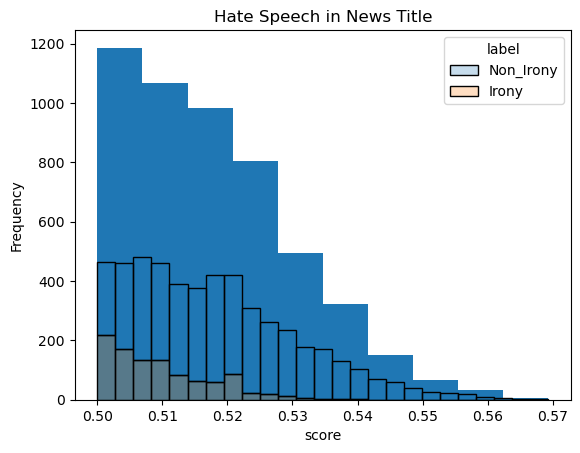

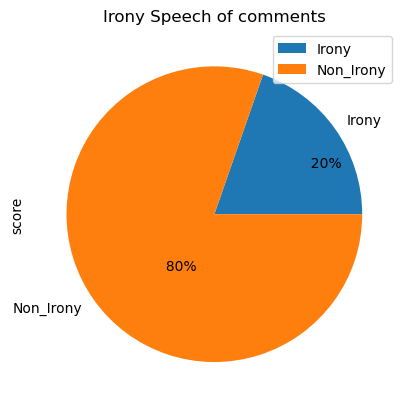

In [48]:
# convert the list into dataframe
df_irony = pd.DataFrame(irony_comments)
# LABEL_0 :-> Normal and LABEL_1 :-> Abusive
#df_hate_title.head()
df_irony["label"]=df_irony["label"].replace(["LABEL_0", "LABEL_1"], ["Irony", "Non_Irony"])
df_irony.plot(kind='hist', x = 'label', y = 'score', title = 'Hate Speech in News Title')
sns.histplot(data=df_irony, x="score", hue="label", multiple="stack", bins=25, alpha=0.25)

# Plot the Real News Content data - Pie Chart
df_irony.groupby(['label']).sum().plot(kind='pie', y='score', autopct='%20.0f%%', title='Irony Speech of comments')

In [49]:
df_irony

label     score
0     Non_Irony  0.515559
1     Non_Irony  0.511770
2     Non_Irony  0.504204
3         Irony  0.503117
4     Non_Irony  0.519359
...         ...       ...
5107  Non_Irony  0.526499
5108      Irony  0.507012
5109      Irony  0.536754
5110      Irony  0.511569
5111  Non_Irony  0.524799

[5112 rows x 2 columns]

In [50]:
#df_new = df
df

id                                           comments  label
1        0     মেয়েরা উদ্দেশ্য অনুসারে বোবা বোবা আচরণ সুন্দর      1
2        1  গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা সত্যিই পছন্দ করি।...      1
3        2  বাহ ... পাচ্ছি সত্যিই দোষী দোষী সাব্যস্ত#নোটপ্...      1
4        3                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ      1
5        4                     থান্ডার 830 জেগে উঠলে ভালবাসুন      1
...    ...                                                ...    ...
5108  5107      আলগা পিরিতি। জেলার মানুষ কষ্ট করতেছে খবর নেই।      0
5109  5108                 ফেইসবুক ছাড়া আপনাদের কোথাও মেলেনা।      0
5110  5109                     ঢাকাই বকবক ছাড়া বকবক পাটির দল?      0
5111  5110            সংবাদ পড়া বাদ দিয়ে মানুষের পাশে দাঁড়ান।      0
5112  5111  কার বাবা কার সন্তান হবে, জন্মের রেস প্রতিযোগিত...      0

[5112 rows x 3 columns]

In [51]:
#Calculate Score
df_new["label"]=df_irony["label"]
df_new["score"]=df_irony["score"]
x_NonIrony=0.64
x_Irony = 0.36
df_new["score"]=irony(df_new["score"], df_irony, x_NonIrony, x_Irony)

/tmp/ipykernel_209066/1609873355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i]=x_NonIrony+df_temp["score"][i]
/tmp/ipykernel_209066/1609873355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i]=x_NonIrony+df_temp["score"][i]
/tmp/ipykernel_209066/1609873355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[i]=x_NonIrony+df_temp["score"][i]
/tmp/ipykernel_209066/1609873355.py:7: SettingWithCopyWarning

In [52]:
# Explotaroy Data Analysis
# Normalize the data
df_new["score"]=dataExplore(df_new["score"])

In [53]:
df_new["score"]

0       0.846103
1       0.841563
2       0.822945
3       0.103974
4       0.954803
          ...   
5107    1.000000
5108    0.719287
5109    0.747324
5110    0.723583
5111    1.000000
Name: score, Length: 5112, dtype: float64

### Transformer Model Evaluation

#### Convert Dataset Dictionary to Huggingface

In [54]:
# Replacing None value from label and score column
df = df.replace(to_replace='None', value=np.nan).dropna()

In [55]:
# replacing values Irony=0 Non_Irony=1
#df['label'].replace(['Irony', 'Non_Irony'],
#                        [0, 1], inplace=True)

In [56]:
df

id                                           comments  label
1        0     মেয়েরা উদ্দেশ্য অনুসারে বোবা বোবা আচরণ সুন্দর      1
2        1  গুরুত্বপূর্ণ প্রশ্ন জিজ্ঞাসা সত্যিই পছন্দ করি।...      1
3        2  বাহ ... পাচ্ছি সত্যিই দোষী দোষী সাব্যস্ত#নোটপ্...      1
4        3                   হাহ, মজার বিষয়।#আনোয়েড #গ্রুআপ      1
5        4                     থান্ডার 830 জেগে উঠলে ভালবাসুন      1
...    ...                                                ...    ...
5108  5107      আলগা পিরিতি। জেলার মানুষ কষ্ট করতেছে খবর নেই।      0
5109  5108                 ফেইসবুক ছাড়া আপনাদের কোথাও মেলেনা।      0
5110  5109                     ঢাকাই বকবক ছাড়া বকবক পাটির দল?      0
5111  5110            সংবাদ পড়া বাদ দিয়ে মানুষের পাশে দাঁড়ান।      0
5112  5111  কার বাবা কার সন্তান হবে, জন্মের রেস প্রতিযোগিত...      0

[5112 rows x 3 columns]

In [57]:
import pandas as pd
import datasets
from datasets import Dataset, DatasetDict
#from sklearn import datasets

# store the value into a new dataframe
df_eval = df[["comments", "label"]]
# Rename output column to label. As we have already used output in other places. We are using output=label only for validation data set
df_eval.rename(columns ={"output":"label"}, inplace = True)
#convert dataframe into a dataset
df_eval = Dataset.from_pandas(df_eval)

<frozen importlib._bootstrap>:228: RuntimeWarning: pyarrow._fs.FileInfo size changed, may indicate binary incompatibility. Expected 64 from C header, got 88 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: pyarrow._fs.FileSelector size changed, may indicate binary incompatibility. Expected 48 from C header, got 72 from PyObject
/tmp/ipykernel_209066/1338289112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval.rename(columns ={"output":"label"}, inplace = True)


In [58]:
df_eval

Dataset({
    features: ['comments', 'label'],
    num_rows: 5112
})

In [59]:
df_eval.features

{'comments': Value(dtype='string', id=None),
 'label': Value(dtype='int32', id=None)}

In [60]:
#split train and test dataset
df_train = df_eval.shuffle(seed=42).select(range(4000))
df_test = df_eval.shuffle(seed=42).select(range(1111))

In [61]:
# Save train and test data into dataset dictionary
df_eval = DatasetDict({
    'train': df_train,
    'test': df_test
})

In [62]:
# show the dictionary
df_eval

DatasetDict({
    train: Dataset({
        features: ['comments', 'label'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['comments', 'label'],
        num_rows: 1111
    })
})

In [63]:
df_train = df_eval["train"]
df_test = df_eval["test"]

#### Evaluate Model

In [64]:
len(df)

5112

In [65]:
from transformers import AutoModelForSequenceClassification
import numpy as np
from datasets import load_metric
from transformers import TrainingArguments
from transformers import Trainer
from transformers import AutoTokenizer
# tokenizer function
def tokenize_com(examples):
    return tokenizer(examples["comments"], padding="max_length", truncation = True, max_length=512)

In [78]:
# Tokenize data
def tokenized_data(df):   
    #map tokenizer
    token_com = df_eval.map(tokenize_com, batched = True)
    
    ds = ds.train_test_split(test_size=0.2, stratify_by_column="label")
    # Split tokenized dataset into train and test data
    df_train_com = token_com["train"].shuffle(seed=42).select(range(4000))
    df_test_com = token_com["test"].shuffle(seed=42).select(range(1111))
    
    return df_train_com, df_test_com

In [79]:
# Train model
def trainer(model_name, args, train_dataset, eval_dataset, compute_metrics):
    trainer = Trainer(model=model_name,
                      args = training_args,
                      train_dataset = train_dataset,
                      eval_dataset = eval_dataset,
                      compute_metrics = compute_metrics)
    return trainer

In [80]:
#Declare Accuracy, precision, recall metric
def compute_metrics(eval_pred):
    accuracy_metric = load_metric("accuracy")
    precision_metric = load_metric("precision")
    recall_metric = load_metric("recall")
    f1_metric = load_metric("f1")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis =-1)
    accuracy = accuracy_metric.compute(predictions = predictions, references = labels)["accuracy"]
    precision = precision_metric.compute(predictions=predictions, references=labels)["precision"]
    recall = recall_metric.compute(predictions = predictions, references = labels)["recall"]
    f1_score = f1_metric.compute(predictions=predictions, references=labels)["f1"]

    return {"accuracy": accuracy, "precision":precision, "recall":recall, "f1": f1_score}

In [81]:
# Empty cache to avoid CUDA out of memory issue
#import torch
#torch.cuda.empty_cache()

In [82]:
df_eval

DatasetDict({
    train: Dataset({
        features: ['comments', 'label'],
        num_rows: 4000
    })
    test: Dataset({
        features: ['comments', 'label'],
        num_rows: 1111
    })
})

In [83]:
from transformers import AutoModel, BertTokenizer
irony_name = "csebuetnlp/banglabert"
#tokenizer = AutoTokenizer.from_pretrained(irony_name, labels=None)
tokenizer = AutoTokenizer.from_pretrained(irony_name)
df_train, df_test = tokenized_data(df_eval)

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [84]:
df_train

Dataset({
    features: ['comments', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4000
})

In [85]:
df_test

Dataset({
    features: ['comments', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1111
})

In [86]:
#model_irony = AutoModelForSequenceClassification.from_pretrained(irony_name, num_labels=2, ignore_mismatched_sizes=True).to(device)
model_irony = AutoModelForSequenceClassification.from_pretrained(irony_name, num_labels=2, ignore_mismatched_sizes=True).to(device)
training_args = TrainingArguments("test-trainer-banglaBERT", {'reprocess_input_data': True}, evaluation_strategy="epoch")

Some weights of the model checkpoint at csebuetnlp/banglabert were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.out_proj.weight', 'classi

In [87]:
# Remove unnecessary column that are causing error
#df_train= df_train.remove_columns(["comments"])
#df_test= df_test.remove_columns(["comments"])

In [88]:
# Remove unnecessary column that are causing error
#df_train= df_train.remove_columns(["__index_level_0__"])
#df_test= df_test.remove_columns(["__index_level_0__"])

In [89]:
#df_train["label"]

In [90]:
# Train and evaluate title data on irony speech analysis model 
trainer_irony = trainer(model_irony, training_args, df_train, df_test, compute_metrics)

In [91]:
df_train

Dataset({
    features: ['comments', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4000
})

In [92]:
#df_train[['input_ids','attention_mask','token_type_ids','label']]

In [93]:
trainer_irony.train()

The following columns in the training set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: comments. If comments are not expected by `ElectraForSequenceClassification.forward`,  you can safely ignore this message.
/home/raquiba/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1500
  Number of trainable parameters = 110618882


Saving model checkpoint to test-trainer-banglaBERT/checkpoint-500
Configuration saved in test-trainer-banglaBERT/checkpoint-500/config.json
Model weights saved in test-trainer-banglaBERT/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: comments. If comments are not expected by `ElectraForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1111
  Batch size = 8
/tmp/ipykernel_209066/3231114443.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_metric = load_metric("accuracy")
Saving model checkpoint to test-trainer-banglaBERT/checkpoint-1000
Configuration saved in test-trainer-banglaBERT/checkpoint-1000/config.json
Model weights 

TrainOutput(global_step=1500, training_loss=0.11616522216796875, metrics={'train_runtime': 354.0437, 'train_samples_per_second': 33.894, 'train_steps_per_second': 4.237, 'total_flos': 3157332664320000.0, 'train_loss': 0.11616522216796875, 'epoch': 3.0})

In [94]:
trainer_irony.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: comments. If comments are not expected by `ElectraForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1111
  Batch size = 8


{'eval_loss': 0.004940225277096033,
 'eval_accuracy': 0.9990999099909991,
 'eval_precision': 0.9975903614457832,
 'eval_recall': 1.0,
 'eval_f1': 0.9987937273823884,
 'eval_runtime': 19.135,
 'eval_samples_per_second': 58.061,
 'eval_steps_per_second': 7.264,
 'epoch': 3.0}

In [95]:
#df_train["label"] = df_train["label"].apply(lambda x: str(x))
#df_train["label"] = df_train["label"].replace(to_replace='None', value=np.nan).dropna()
#df_train = list(filter(lambda x: df_train[x] is not None, df_train))